In [ ]:
# mounting google drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.callbacks import ModelCheckpoint

# Data loading and preprocessing 

In [ ]:
train_dir = "/content/drive/MyDrive/ML Project/Pneumonia//train"
valid_dir = "/content/drive/MyDrive/ML Project/Pneumonia/valid"
test_dir = "/content/drive/MyDrive/ML Project/Pneumonia/test"

In [ ]:
batch_size=28
target_size=(150,150)
rescale=1./255.
zoom_range=0.3
vertical_flip=True

train_datagen=ImageDataGenerator(rescale=rescale,zoom_range=zoom_range ,vertical_flip=vertical_flip)
test_datagen=ImageDataGenerator(rescale=rescale)
valid_datagen=ImageDataGenerator(rescale=rescale)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=target_size,batch_size=batch_size,class_mode="binary")
valid_generator = valid_datagen.flow_from_directory(valid_dir,target_size=target_size,batch_size=batch_size,class_mode="binary")
test_generator = test_datagen.flow_from_directory(test_dir,target_size=target_size,batch_size=batch_size,class_mode="binary")

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Building model

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu',padding='same',
                    input_shape=(150, 150, 3)))
model.add(layers.Conv2D(64, (5,5), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=0.0005),loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      51264     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 256)       2

# Training model

In [ ]:
checkpoint = ModelCheckpoint(filepath,monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True, mode='auto')
history = model.fit(train_generator, steps_per_epoch=train_generator.samples // batch_size, epochs=epochs,
                    validation_data=valid_generator, callbacks=callbacks_list)

Epoch 1/50
186/186 [==============================] - 4164s 22s/step - loss: 0.9165 - accuracy: 0.7161 - val_loss: 0.8397 - val_accuracy: 0.5625

Epoch 00001: val_loss improved from inf to 0.83973, saving model to weights-improvement.hdf5
Epoch 2/50
186/186 [==============================] - 102s 549ms/step - loss: 0.4702 - accuracy: 0.8032 - val_loss: 0.7364 - val_accuracy: 0.6250

Epoch 00002: val_loss improved from 0.83973 to 0.73636, saving model to weights-improvement.hdf5
Epoch 3/50
186/186 [==============================] - 102s 545ms/step - loss: 0.3562 - accuracy: 0.8549 - val_loss: 0.5430 - val_accuracy: 0.6875

Epoch 00003: val_loss improved from 0.73636 to 0.54302, saving model to weights-improvement.hdf5
Epoch 4/50
186/186 [==============================] - 101s 542ms/step - loss: 0.3228 - accuracy: 0.8812 - val_loss: 0.5417 - val_accuracy: 0.8125

Epoch 00004: val_loss improved from 0.54302 to 0.54171, saving model to weights-improvement.hdf5
Epoch 5/50
186/186 [=========

# Loss/Accuracy visualization 

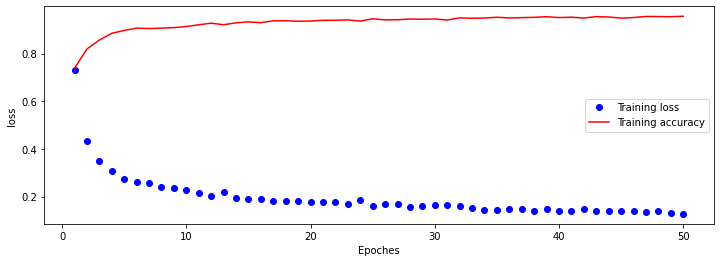

In [ ]:
def plot(history,figsize,y,x):
    history_dict=history.history
    loss=history_dict[y]
    acc=history_dict[x]
    epoch=range(1,len(acc)+1)
    plt.figure(figsize=figsize)
    plt.plot(epoch,loss,'bo',label='Training loss')
    plt.plot(epoch,acc,'r',label='Training accuracy')
    plt.xlabel('Epoches')
    plt.ylabel('loss')
    plt.legend()
plot(train_history,(12,4),y='loss',x='accuracy')


# Test evaluation 

In [ ]:
results = model.evaluate(test_set)
print("test set resulat is",results)

23/23 [==============================] - 422s 19s/step - loss: 0.2782 - accuracy: 0.9299
test set resulat is [0.27924479126930237, 0.9298718070983887]
